## Market1501 / cuhk03 

In [1]:
import keras
import tensorflow as tf
print('keras:\t', keras.__version__)
print('tf:\t', tf.__version__)

Using TensorFlow backend.


keras:	 2.1.3
tf:	 1.8.0


{'data_root': './data'}

./data\cuhk03_release found :)
./data\Market-1501-v15.09.15 found :)
./data\DukeMTMC-reID found :)
found memmaped ./data\cuhk03_release\labeled221x221.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap ./data\DukeMTMC-reID\bounding_box_test221x221.npy
load memmap ./data\DukeMTMC-reID\bounding_box_train221x221.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270
(6, 221, 221, 6)
is same: [1 0]
is same: [0 1]
is same: [1 0]
is same: [1 0]
is same: [0 1]
is same: [0 1]


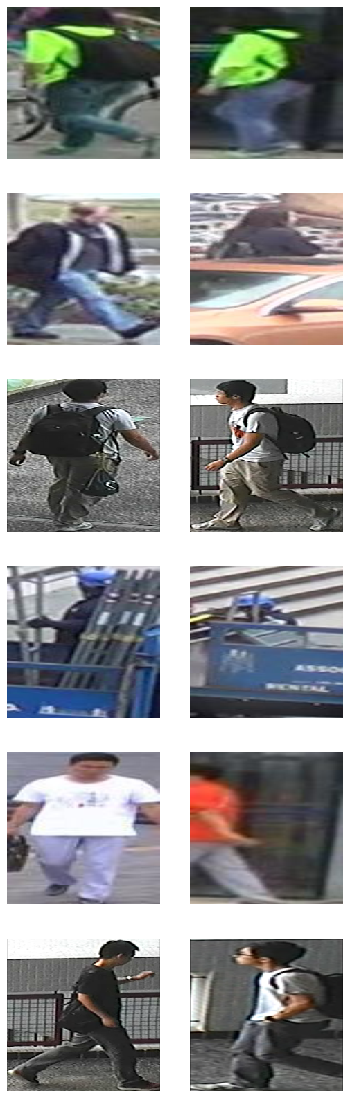

In [2]:
%matplotlib inline
import json
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
print('')
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from reid.data import DataSampler

from keras.callbacks import ModelCheckpoint, TerminateOnNaN
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from os.path import join, isfile, isdir, exists, splitext

root = Settings['data_root']

target_w = 221
target_h = 221


sampler = DataSampler(root, target_w, target_h)

npos = 3
nneg = 3
x, y = sampler.get_test_batch(npos, nneg)
n = len(x)
print(x.shape)

fig = plt.figure(figsize=(6, 20))
for pid in range(n):
    print('is same:', y[pid])
    im = x[pid]
    ax = fig.add_subplot(n, 2, pid*2+1); ax.axis('off')
    ax.imshow(im[:,:,0:3])
    ax = fig.add_subplot(n, 2, pid*2+2); ax.axis('off')
    ax.imshow(im[:,:,3:6])
plt.show()

## MOT16 dataset

./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-05\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 818
elapsed 0.030080080032348633
same [0 1]


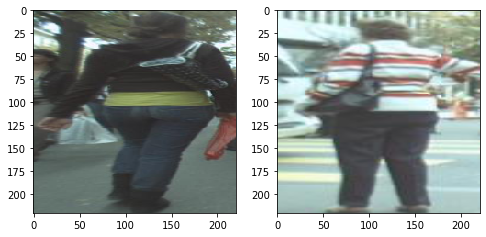

In [3]:
from reid.data import MOT16Sampler
from time import time

mot_sampler = MOT16Sampler(root, target_w, target_h, 'MOT16-05')


_start = time()
x, y = mot_sampler.sample()
_end = time()
print('elapsed', _end - _start)

print('same', y[0])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(121)
ax.imshow(x[0,:,:,0:3].astype('uint8'))
ax = fig.add_subplot(122)
ax.imshow(x[0,:,:,3:6].astype('uint8'))
plt.show()

./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-02\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1736
./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-02\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1736
./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-05\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 818
./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-09\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 1872
./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT16-10\data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
(MOT16) total number of bounding boxes: 2587
./data\MOT16 found :)
MOT16: load memmapped file ./data\MOT16\train\MOT

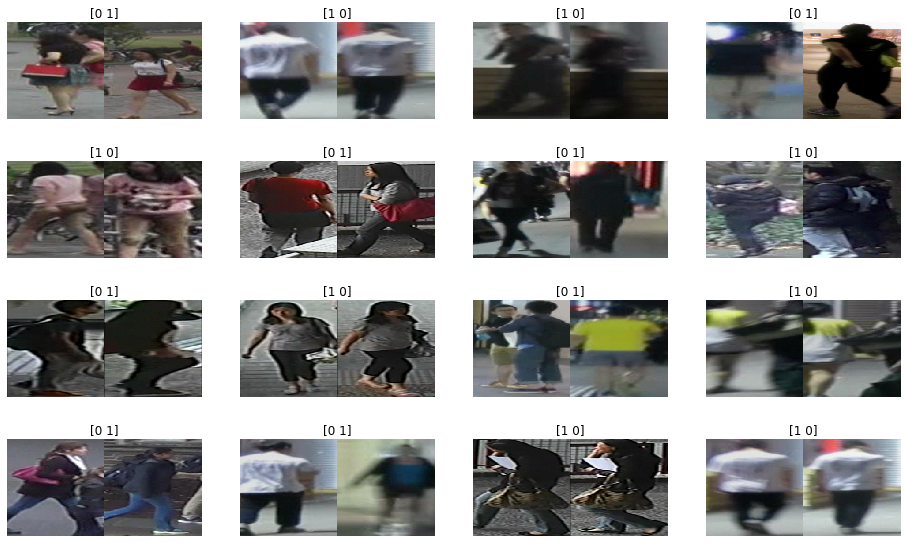

In [4]:
from reid.data import Data
import numpy as np
root = Settings['data_root']
# user = Settings['UMPM']['username']
# pwd = Settings['UMPM']['password']


sampler = Data(root, target_w, target_h)
print('------------')


x, y = sampler.train()

fig = plt.figure(figsize=(16,20))
for idx, im in enumerate(x):
    ax = fig.add_subplot(8, 4, idx+1); ax.axis('off')
    Im = np.concatenate([im[:,:,0:3], im[:,:,3:6]], axis=1).astype('uint8')
    ax.imshow(Im)
    ax.set_title(str(y[idx]))
    
plt.show()

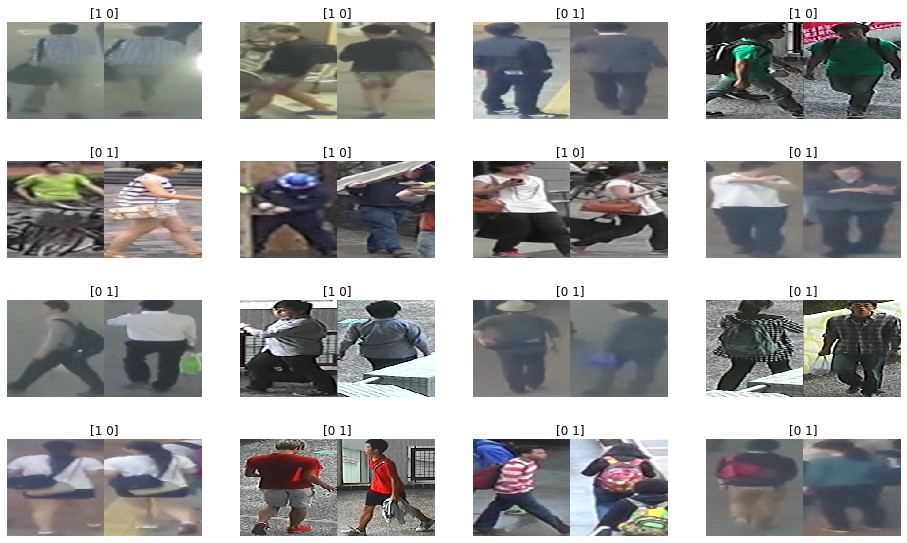

In [5]:
x, y = sampler.test()

fig = plt.figure(figsize=(16,20))
for idx, im in enumerate(x):
    ax = fig.add_subplot(8, 4, idx+1); ax.axis('off')
    Im = np.concatenate([im[:,:,0:3], im[:,:,3:6]], axis=1).astype('uint8')
    ax.imshow(Im)
    ax.set_title(str(y[idx]))
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


y: 1


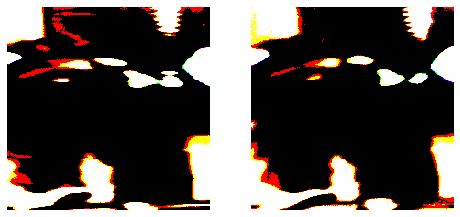

In [6]:
def generate_training():
    global sampler
    while True:
        X, Y = sampler.train(add_noise=True)
        X_a = preprocess_input(X[:,:,:,0:3])
        X_b = preprocess_input(X[:,:,:,3:6])
        yield ([X_a, X_b], Y[:, 0])
        
def generate_test():
    global sampler
    while True:
        X, Y = sampler.test()
        X_a = preprocess_input(X[:,:,:,0:3])
        X_b = preprocess_input(X[:,:,:,3:6])
        yield ([X_a, X_b], Y[:, 0])

        
# ------------------------
gen = generate_training()

(Xa, Xb), Y = next(gen)

i = 5
print("y:", Y[i])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121); ax.axis("off")
ax.imshow(Xa[i])
ax = fig.add_subplot(122); ax.axis("off")
ax.imshow(Xb[i])

plt.show()

## Training

In [7]:
import h5py

def insert_conv(model, key, conv_h5):
    """ insert conv layer into model
    :param model:
    :param key:
    :param conv_h5:
    :return:
    """
    convl = model.get_layer(key)
    kernel = conv_h5.get('kernel:0')[()]
    convl.set_weights([kernel])
    
def insert_sepconv(model, key, sepconv_h5):
    """ insert conv layer into model
    :param model:
    :param key:
    :param conv_h5:
    :return:
    """
    convl = model.get_layer(key)
    dkernel = sepconv_h5.get('depthwise_kernel:0')[()]
    pkernel = sepconv_h5.get('pointwise_kernel:0')[()]
    convl.set_weights([dkernel, pkernel])

def insert_bn(model, key, bn_h5):
    """ insert the bn layer into the model
    :param model:
    :param key:
    :param bn_h5:
    :return:
    """
    print('insert bn:', key)
    beta = bn_h5.get('beta:0')[()]
    gamma = bn_h5.get('gamma:0')[()]
    mm = bn_h5.get('moving_mean:0')[()]
    mv = bn_h5.get('moving_variance:0')[()]
    bn_layer = model.get_layer(key)
    bn_layer.set_weights([beta, gamma, mm, mv])
    
def insert_fc(model, key, fc_h5):
    print('insert fc:', key)
    bias = fc_h5.get('bias:0')[()]
    kernel = fc_h5.get('kernel:0')[()]
    hidden_layer = model.get_layer(key)
    hidden_layer.set_weights([kernel, bias])


def load_weights(model, filepath):
    if isfile(filepath):
        with h5py.File(filepath, 'r') as f:
            model_weights = f.get('model_weights')
            
            for fc in ['dense_1', 'dense_2', 'dense_3']:
                fcl = model_weights.get(fc).get(fc)
                insert_fc(model, fc, fcl)
            
            
            
            seq = model_weights.get('sequential_1')
            for layer in seq.layers:
                name = layer.name

In [188]:
#from keras.applications.densenet import DenseNet121, preprocess_input
#from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, concatenate, LeakyReLU
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import load_model

filepath = join(root, 'yunhyuck.h5')
print('model:', filepath)

print('constructing...')

seq = Sequential()
resnet = ResNet50(weights='imagenet', input_shape=(221, 221, 3),include_top=False, pooling='avg')
seq.add(resnet)

for layer in xception.layers[0:-20]:
    layer.trainable = False


input_a = Input(shape=(221, 221, 3))
input_b = Input(shape=(221, 221, 3))

out_a = seq(input_a)
out_b = seq(input_b)

concatenated = concatenate([out_a, out_b])
hidden1 = Dense(256, activation='relu', name='dense_1')(concatenated)
hidden_Leak1 = LeakyReLU(0.2)(hidden1)
hidden_drp1 = Dropout(0.7)(hidden_Leak1)

hidden2 = Dense(128, activation='relu', name='dense_2')(hidden_drp1)
hidden_Leak2 = LeakyReLU(0.2)(hidden2)
hidden_drp2 = Dropout(0.5)(hidden_Leak2)

hidden3 = Dense(64, activation='relu', name='dense_3')(hidden_drp2)
hidden_Leak3 = LeakyReLU(0.2)(hidden3)
hidden_drp3 = Dropout(0.3)(hidden_Leak3)

hidden4 = Dense(32, activation='relu', name='dense_4')(hidden_drp3)
hidden_Leak4 = LeakyReLU(0.2)(hidden4)
hidden_drp4 = Dropout(0.1)(hidden_Leak4)

out = Dense(1, activation='sigmoid', name='dense_5')(hidden_drp4)

model = Model([input_a, input_b], out)

if isfile(filepath):
    print('weights found... loading...')
    model.load_weights(filepath)

model: data_storage\yunhyuck.h5
constructing...


In [189]:
from keras.optimizers import SGD, RMSprop, Nadam, Adam, Adadelta
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
loss = 'binary_crossentropy'
metrics = ['binary_accuracy', 'acc']
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 2048)         23587712    input_38[0][0]                   
                                                                 input_39[0][0]                   
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 4096)         0           sequential_15[1][0]              
          

Epoch 1/300
19/20 [===========================>..] - ETA: 1s - loss: 0.8113 - binary_accuracy: 0.5164 - acc: 0.5164
Epoch 00001: val_acc improved from -inf to 0.50625, saving model to data_storage\yunhyuck.h5
20/20 [==============================] - 47s 2s/step - loss: 0.8085 - binary_accuracy: 0.5094 - acc: 0.5094 - val_loss: 0.7007 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 2/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7833 - binary_accuracy: 0.4934 - acc: 0.4934
Epoch 00002: val_acc improved from 0.50625 to 0.53125, saving model to data_storage\yunhyuck.h5
20/20 [==============================] - 7s 371ms/step - loss: 0.7903 - binary_accuracy: 0.4875 - acc: 0.4875 - val_loss: 0.6940 - val_binary_accuracy: 0.5312 - val_acc: 0.5312
Epoch 3/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7780 - binary_accuracy: 0.4934 - acc: 0.4934
Epoch 00003: val_acc did not improve
20/20 [==============================] - 7s 359ms/step - loss: 0.7830 - bi

19/20 [===========================>..] - ETA: 0s - loss: 0.7065 - binary_accuracy: 0.4901 - acc: 0.4901
Epoch 00025: val_acc did not improve
20/20 [==============================] - 8s 423ms/step - loss: 0.7054 - binary_accuracy: 0.4938 - acc: 0.4938 - val_loss: 0.6937 - val_binary_accuracy: 0.4938 - val_acc: 0.4938
Epoch 26/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7045 - binary_accuracy: 0.4803 - acc: 0.4803
Epoch 00026: val_acc did not improve
20/20 [==============================] - 8s 413ms/step - loss: 0.7062 - binary_accuracy: 0.4750 - acc: 0.4750 - val_loss: 0.7054 - val_binary_accuracy: 0.4625 - val_acc: 0.4625
Epoch 27/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6969 - binary_accuracy: 0.5033 - acc: 0.5033
Epoch 00027: val_acc did not improve
20/20 [==============================] - 9s 434ms/step - loss: 0.6956 - binary_accuracy: 0.4969 - acc: 0.4969 - val_loss: 0.6903 - val_binary_accuracy: 0.5250 - val_acc: 0.5250
Epoch 28/300
19/20 [

Epoch 50/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7012 - binary_accuracy: 0.4967 - acc: 0.4967
Epoch 00050: val_acc did not improve
20/20 [==============================] - 9s 430ms/step - loss: 0.7004 - binary_accuracy: 0.4906 - acc: 0.4906 - val_loss: 0.6955 - val_binary_accuracy: 0.4688 - val_acc: 0.4688
Epoch 51/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6920 - binary_accuracy: 0.4901 - acc: 0.4901
Epoch 00051: val_acc did not improve
20/20 [==============================] - 8s 421ms/step - loss: 0.6911 - binary_accuracy: 0.4969 - acc: 0.4969 - val_loss: 0.6961 - val_binary_accuracy: 0.4688 - val_acc: 0.4688
Epoch 52/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6990 - binary_accuracy: 0.4836 - acc: 0.4836
Epoch 00052: val_acc did not improve
20/20 [==============================] - 9s 432ms/step - loss: 0.7012 - binary_accuracy: 0.4781 - acc: 0.4781 - val_loss: 0.6916 - val_binary_accuracy: 0.5000 - val_acc: 0.5000
Epoch 5

Epoch 75/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7096 - binary_accuracy: 0.4441 - acc: 0.4441
Epoch 00075: val_acc did not improve
20/20 [==============================] - 9s 442ms/step - loss: 0.7081 - binary_accuracy: 0.4437 - acc: 0.4437 - val_loss: 0.6904 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 76/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6948 - binary_accuracy: 0.4934 - acc: 0.4934
Epoch 00076: val_acc did not improve
20/20 [==============================] - 8s 414ms/step - loss: 0.6922 - binary_accuracy: 0.5031 - acc: 0.5031 - val_loss: 0.6984 - val_binary_accuracy: 0.4500 - val_acc: 0.4500
Epoch 77/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6962 - binary_accuracy: 0.4967 - acc: 0.4967
Epoch 00077: val_acc did not improve
20/20 [==============================] - 9s 430ms/step - loss: 0.6964 - binary_accuracy: 0.4969 - acc: 0.4969 - val_loss: 0.6955 - val_binary_accuracy: 0.4562 - val_acc: 0.4562
Epoch 7

Epoch 100/300
19/20 [===========================>..] - ETA: 0s - loss: 0.7007 - binary_accuracy: 0.4539 - acc: 0.4539
Epoch 00100: val_acc did not improve
20/20 [==============================] - 9s 426ms/step - loss: 0.6999 - binary_accuracy: 0.4563 - acc: 0.4563 - val_loss: 0.6919 - val_binary_accuracy: 0.5375 - val_acc: 0.5375
Epoch 101/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6857 - binary_accuracy: 0.5493 - acc: 0.5493
Epoch 00101: val_acc did not improve
20/20 [==============================] - 8s 414ms/step - loss: 0.6848 - binary_accuracy: 0.5594 - acc: 0.5594 - val_loss: 0.6893 - val_binary_accuracy: 0.5250 - val_acc: 0.5250
Epoch 102/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6971 - binary_accuracy: 0.4901 - acc: 0.4901
Epoch 00102: val_acc did not improve
20/20 [==============================] - 9s 427ms/step - loss: 0.6961 - binary_accuracy: 0.4906 - acc: 0.4906 - val_loss: 0.6944 - val_binary_accuracy: 0.4938 - val_acc: 0.4938
Epoc

Epoch 125/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6864 - binary_accuracy: 0.5395 - acc: 0.5395
Epoch 00125: val_acc did not improve
20/20 [==============================] - 8s 420ms/step - loss: 0.6881 - binary_accuracy: 0.5344 - acc: 0.5344 - val_loss: 0.6923 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 126/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6831 - binary_accuracy: 0.5526 - acc: 0.5526
Epoch 00126: val_acc did not improve
20/20 [==============================] - 8s 418ms/step - loss: 0.6833 - binary_accuracy: 0.5531 - acc: 0.5531 - val_loss: 0.6910 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 127/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6832 - binary_accuracy: 0.5296 - acc: 0.5296
Epoch 00127: val_acc did not improve
20/20 [==============================] - 8s 424ms/step - loss: 0.6833 - binary_accuracy: 0.5250 - acc: 0.5250 - val_loss: 0.6911 - val_binary_accuracy: 0.5437 - val_acc: 0.5437
Epoc

Epoch 150/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6742 - binary_accuracy: 0.5526 - acc: 0.5526
Epoch 00150: val_acc did not improve
20/20 [==============================] - 8s 406ms/step - loss: 0.6716 - binary_accuracy: 0.5625 - acc: 0.5625 - val_loss: 0.6908 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 151/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6794 - binary_accuracy: 0.5592 - acc: 0.5592
Epoch 00151: val_acc did not improve
20/20 [==============================] - 9s 429ms/step - loss: 0.6777 - binary_accuracy: 0.5656 - acc: 0.5656 - val_loss: 0.6886 - val_binary_accuracy: 0.5188 - val_acc: 0.5188
Epoch 152/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6836 - binary_accuracy: 0.5395 - acc: 0.5395
Epoch 00152: val_acc did not improve
20/20 [==============================] - 8s 419ms/step - loss: 0.6808 - binary_accuracy: 0.5469 - acc: 0.5469 - val_loss: 0.6869 - val_binary_accuracy: 0.5563 - val_acc: 0.5563
Epoc

Epoch 175/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6790 - binary_accuracy: 0.5724 - acc: 0.5724
Epoch 00175: val_acc did not improve
20/20 [==============================] - 9s 430ms/step - loss: 0.6764 - binary_accuracy: 0.5781 - acc: 0.5781 - val_loss: 0.6855 - val_binary_accuracy: 0.5625 - val_acc: 0.5625
Epoch 176/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6788 - binary_accuracy: 0.5559 - acc: 0.5559
Epoch 00176: val_acc did not improve
20/20 [==============================] - 8s 417ms/step - loss: 0.6799 - binary_accuracy: 0.5531 - acc: 0.5531 - val_loss: 0.6906 - val_binary_accuracy: 0.5000 - val_acc: 0.5000
Epoch 177/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6724 - binary_accuracy: 0.6217 - acc: 0.6217
Epoch 00177: val_acc did not improve
20/20 [==============================] - 9s 436ms/step - loss: 0.6737 - binary_accuracy: 0.6188 - acc: 0.6188 - val_loss: 0.6883 - val_binary_accuracy: 0.5437 - val_acc: 0.5437
Epoc

Epoch 200/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6494 - binary_accuracy: 0.6382 - acc: 0.6382
Epoch 00200: val_acc did not improve
20/20 [==============================] - 8s 425ms/step - loss: 0.6510 - binary_accuracy: 0.6344 - acc: 0.6344 - val_loss: 0.7024 - val_binary_accuracy: 0.4875 - val_acc: 0.4875
Epoch 201/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6913 - binary_accuracy: 0.5296 - acc: 0.5296
Epoch 00201: val_acc did not improve
20/20 [==============================] - 8s 420ms/step - loss: 0.6893 - binary_accuracy: 0.5375 - acc: 0.5375 - val_loss: 0.6983 - val_binary_accuracy: 0.4938 - val_acc: 0.4938
Epoch 202/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6579 - binary_accuracy: 0.6053 - acc: 0.6053
Epoch 00202: val_acc did not improve
20/20 [==============================] - 8s 421ms/step - loss: 0.6574 - binary_accuracy: 0.6062 - acc: 0.6062 - val_loss: 0.6838 - val_binary_accuracy: 0.5687 - val_acc: 0.5687
Epoc

Epoch 225/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6419 - binary_accuracy: 0.6250 - acc: 0.6250
Epoch 00225: val_acc did not improve
20/20 [==============================] - 9s 428ms/step - loss: 0.6451 - binary_accuracy: 0.6250 - acc: 0.6250 - val_loss: 0.6972 - val_binary_accuracy: 0.5188 - val_acc: 0.5188
Epoch 226/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6468 - binary_accuracy: 0.6316 - acc: 0.6316
Epoch 00226: val_acc did not improve
20/20 [==============================] - 9s 432ms/step - loss: 0.6504 - binary_accuracy: 0.6219 - acc: 0.6219 - val_loss: 0.6909 - val_binary_accuracy: 0.5375 - val_acc: 0.5375
Epoch 227/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6464 - binary_accuracy: 0.6118 - acc: 0.6118
Epoch 00227: val_acc did not improve
20/20 [==============================] - 9s 432ms/step - loss: 0.6478 - binary_accuracy: 0.6125 - acc: 0.6125 - val_loss: 0.7258 - val_binary_accuracy: 0.4437 - val_acc: 0.4437
Epoc

Epoch 250/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6343 - binary_accuracy: 0.6316 - acc: 0.6316
Epoch 00250: val_acc did not improve
20/20 [==============================] - 8s 415ms/step - loss: 0.6335 - binary_accuracy: 0.6312 - acc: 0.6312 - val_loss: 0.6711 - val_binary_accuracy: 0.5750 - val_acc: 0.5750
Epoch 251/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6509 - binary_accuracy: 0.6250 - acc: 0.6250
Epoch 00251: val_acc did not improve
20/20 [==============================] - 9s 435ms/step - loss: 0.6545 - binary_accuracy: 0.6156 - acc: 0.6156 - val_loss: 0.6971 - val_binary_accuracy: 0.5250 - val_acc: 0.5250
Epoch 252/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6529 - binary_accuracy: 0.6020 - acc: 0.6020
Epoch 00252: val_acc did not improve
20/20 [==============================] - 10s 491ms/step - loss: 0.6538 - binary_accuracy: 0.6062 - acc: 0.6062 - val_loss: 0.6891 - val_binary_accuracy: 0.5437 - val_acc: 0.5437
Epo

Epoch 275/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6097 - binary_accuracy: 0.6776 - acc: 0.6776
Epoch 00275: val_acc did not improve
20/20 [==============================] - 9s 443ms/step - loss: 0.6083 - binary_accuracy: 0.6750 - acc: 0.6750 - val_loss: 0.7098 - val_binary_accuracy: 0.5062 - val_acc: 0.5062
Epoch 276/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6212 - binary_accuracy: 0.6645 - acc: 0.6645
Epoch 00276: val_acc did not improve
20/20 [==============================] - 9s 430ms/step - loss: 0.6242 - binary_accuracy: 0.6562 - acc: 0.6562 - val_loss: 0.7130 - val_binary_accuracy: 0.4938 - val_acc: 0.4938
Epoch 277/300
19/20 [===========================>..] - ETA: 0s - loss: 0.6402 - binary_accuracy: 0.6151 - acc: 0.6151
Epoch 00277: val_acc did not improve
20/20 [==============================] - 9s 452ms/step - loss: 0.6355 - binary_accuracy: 0.6250 - acc: 0.6250 - val_loss: 0.7004 - val_binary_accuracy: 0.5437 - val_acc: 0.5437
Epoc

Epoch 300/300
19/20 [===========================>..] - ETA: 0s - loss: 0.5966 - binary_accuracy: 0.6612 - acc: 0.6612
Epoch 00300: val_acc did not improve
20/20 [==============================] - 9s 441ms/step - loss: 0.5981 - binary_accuracy: 0.6594 - acc: 0.6594 - val_loss: 0.6851 - val_binary_accuracy: 0.5437 - val_acc: 0.5437


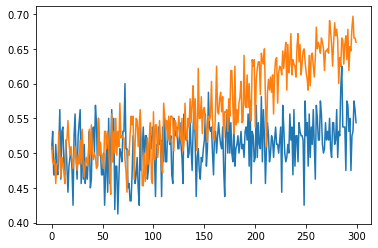

In [190]:
from keras.callbacks import ModelCheckpoint, TerminateOnNaN

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1, 
                             save_weights_only=True,
                             save_best_only=True, 
                             mode='max')
callbacks_list = [checkpoint, TerminateOnNaN()]

history = model.fit_generator(generate_training(), 
                             validation_data=generate_test(),
                             validation_steps=10,
                             steps_per_epoch=20,
                             epochs=300,
                             callbacks=callbacks_list)

acc = history.history['val_binary_accuracy']
tacc = history.history['binary_accuracy']

plt.plot(range(len(acc)), acc)
plt.plot(range(len(tacc)), tacc)
plt.show()

In [191]:
scores = model.evaluate_generator(generate_training(), steps=10)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

binary_accuracy: 60.00%


In [192]:
scores = model.evaluate_generator(generate_test(), steps=10)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

binary_accuracy: 59.38%


data_storage\Market-1501-v15.09.15 found :)


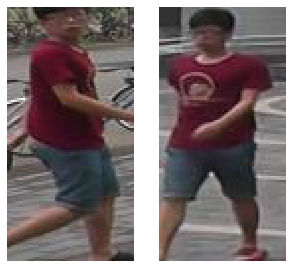

In [193]:
from pak.datasets.Market1501 import Market1501
from math import ceil
import cv2
from os.path import isfile, join

root = 'data_storage'
m1501 = Market1501(root)
X, Y = m1501.get_train()

im1 = X[0]
im2 = X[2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

In [194]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_38 (InputLayer)           (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           (None, 221, 221, 3)  0                                            
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, 2048)         23587712    input_38[0][0]                   
                                                                 input_39[0][0]                   
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 4096)         0           sequential_15[1][0]              
          

In [195]:
def predict(A, B):
        s1 = 221
        s2 = 221
        size = (s1, s2)
        if isinstance(A, list) or len(A.shape) == 4:
            assert len(A) == len(B)
            n = len(A)
            assert n > 0
            Xa = np.zeros((n, s1, s2, 3))
            Xb = np.zeros((n, s1, s2, 3))
            for idx, (a, b) in enumerate(zip(A, B)):
                Xa[idx, :, :, :] = cv2.resize(a, size)
                Xb[idx, :, :, :] = cv2.resize(b, size)
            Xa = preprocess_input(Xa)
            Xb = preprocess_input(Xb)
        elif len(A.shape) == 3:
            a = A
            b = B
            assert len(b.shape) == 3
            w1, h1, c1 = a.shape
            w2, h2, c2 = b.shape
            assert c1 == c2 == 3
            
            if w1 != s1 or h1 != s2:
                a = cv2.resize(a, size)
            if w2 != s1 or h2 != s2:
                b = cv2.resize(b, size)
            Xa = preprocess_input(a.astype('float64'))
            Xb = preprocess_input(b.astype('float64'))
            Xa = np.expand_dims(Xa, axis=0)
            Xb = np.expand_dims(Xb, axis=0)
        else:
            raise ValueError('wrong input shape' + str(A.shape))
        
        Y = model.predict([Xa, Xb])
        return Y[:, 0]

score: [0.352703]


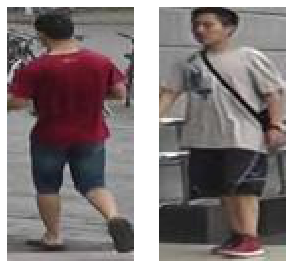

In [196]:
im1 = X[20]
im2 = X[52]

score = predict(im1, im2)

print('score:', score)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(121); ax.axis('off')
ax.imshow(im1)
ax = fig.add_subplot(122); ax.axis('off')
ax.imshow(im2)
plt.show()

score: [38.862774 64.815025 47.29408  38.768997 54.141117 44.314392]


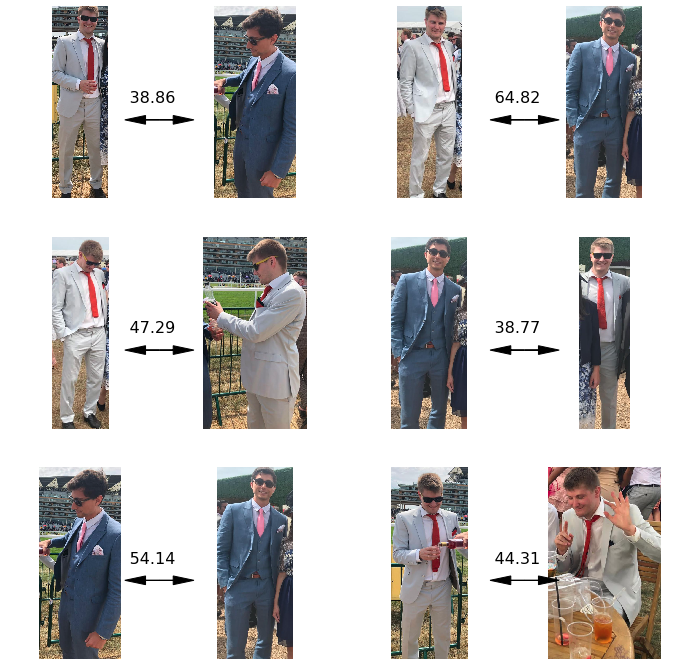

In [197]:
A = ['im01', 'im02', 'im03', 'im09', 'im10', 'im04']
B = ['im10', 'im09', 'im07', 'im05', 'im09', 'im08']

A = [
    cv2.cvtColor(cv2.imread(join('img', a) + '.png'), 
                 cv2.COLOR_BGR2RGB) for a in A
]
B = [
    cv2.cvtColor(cv2.imread(join('img', b) + '.png'), 
                 cv2.COLOR_BGR2RGB) for b in B
]
assert len(A) == len(B)
n = len(A)

score = predict(A, B)*100

print('score:', score)

fig = plt.figure(figsize=(12, 12))

for i, (a, b, s) in enumerate(zip(A, B, score)):
    
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+1)
    ax.axis('off')
    ax.imshow(a)
    ax = fig.add_subplot(int(ceil(n/2)), 4, i*2+2)
    ax.axis('off')
    ax.imshow(b)
    
    txt = "{:10.2f}".format(s)
    ax = fig.add_subplot(int(ceil(n/2)), 2, i+1)
    ax.axis('off')
    ax.text(0.3, 0.5, txt, fontsize=16)
    ax.plot([0, 1], [0, 1], alpha=0.0)
    ax.arrow(x=0.5, y=0.4, dx=-0.05, dy=0, head_width=0.05, color='black')
    ax.arrow(x=0.5, y=0.4, dx=0.05, dy=0, head_width=0.05, color='black')


plt.show()